# What is Resume Screening?
- Hiring the right talent is a challenge for all businesses. This challenge is magnified by the high volume of applicants if the business is labour-intensive, growing, and facing high attrition rates.

- An example of such a business is that IT departments are short of growing markets. In a typical service organization, professionals with a variety of technical skills and business domain expertise are hired and assigned to projects to resolve customer issues. This task of selecting the best talent among many others is known as Resume Screening.

- Typically, large companies do not have enough time to open each CV, so they use machine learning algorithms for the Resume Screening task.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
resumeData = pd.read_csv(r'C:\Users\amany\Desktop\archive datasets\UpdatedResumeDataSet.csv')
resumeData.shape

(962, 2)

In [3]:
resumeData.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
resumeData['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Operations Manager           40
Data Science                 40
Blockchain                   40
Sales                        40
ETL Developer                40
Mechanical Engineer          40
Arts                         36
Database                     33
Health and fitness           30
Electrical Engineering       30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [5]:
resumeData['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

## visualize the number of category

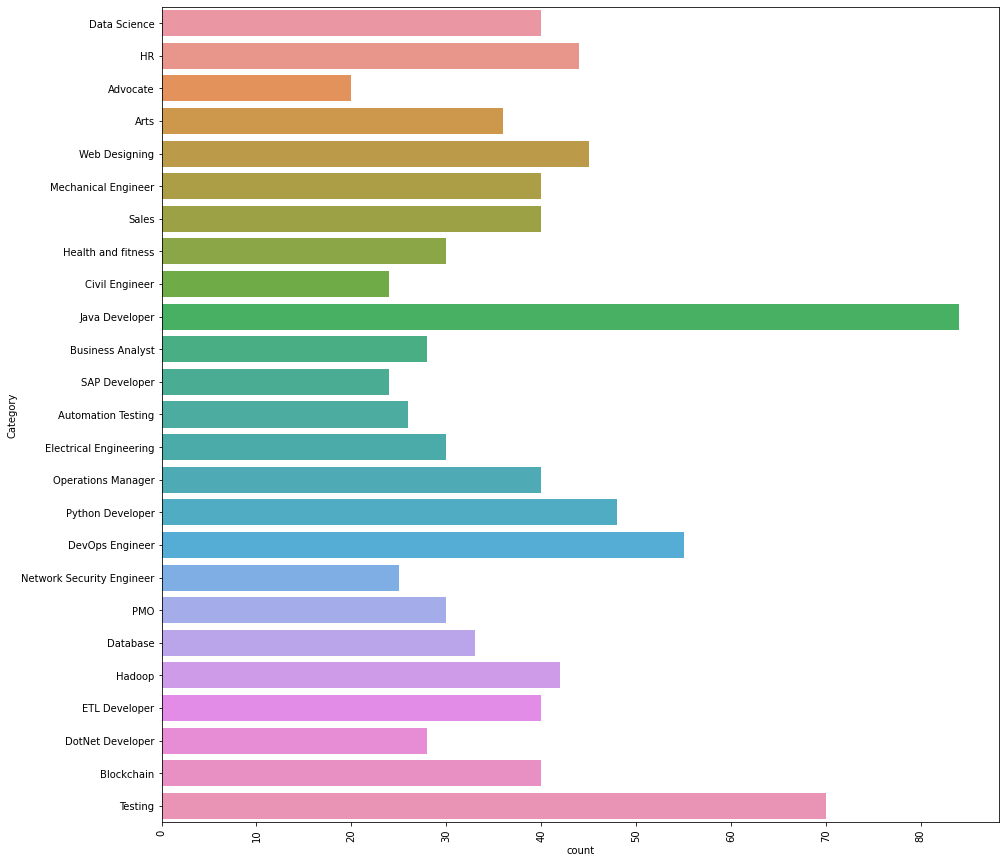

In [6]:
plt.figure(1,figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y='Category',data=resumeData);

## visualize the distribution of categories

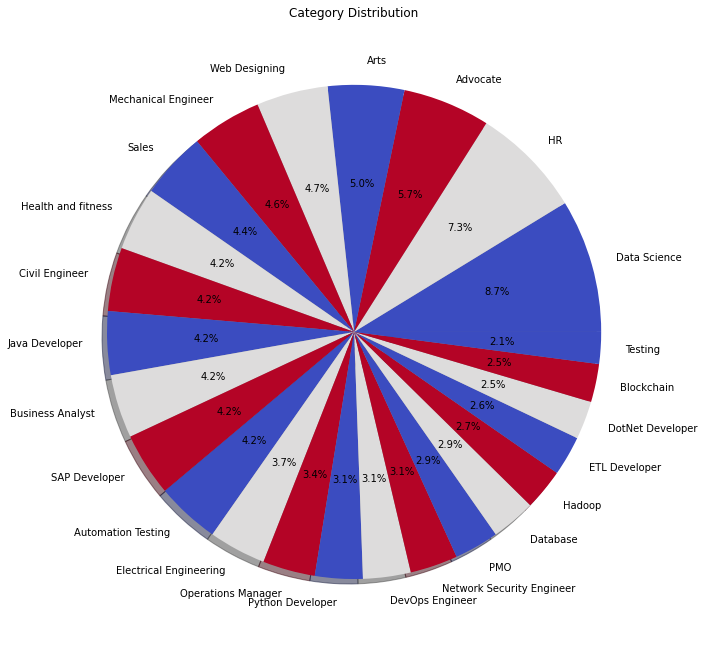

In [7]:
from matplotlib.gridspec import GridSpec

targetcounts=resumeData['Category'].value_counts()
targetlabels=resumeData['Category'].unique()

## make square figure and axes
plt.figure(1,figsize=(25,25))
the_grid=GridSpec(2,2) # ncols,crows

cmap=plt.get_cmap('coolwarm')
colors=[cmap(i) for i in np.linspace(0,1,3)]

plt.subplot(the_grid[0,1],aspect=1,title="Category Distribution")

source_pie=plt.pie(targetcounts,labels=targetlabels,autopct='%1.1f%%',shadow=True,colors=colors)
plt.show()


In [8]:
the_grid[0,1]

GridSpec(2, 2)[0:1, 1:2]

In [9]:
import re
def cleanresume(reviewtext):
    resu=re.sub('[^a-zA-Z0-9]',' ',reviewtext)
    resu=re.sub('\s+',' ',resu)
    return resu

In [10]:
resumeData['Cleaned_Resume']=resumeData.Resume.apply(lambda x:cleanresume(x))

In [21]:
resumeData.Resume

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [11]:
resumeData.shape

(962, 3)

## Create WordCloud

In [13]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

onesetofstopwords=set(stopwords.words('english'))
totalwords=[]
sentence=resumeData['Resume'].values
cleanedsentences=" "

for i in range(0,160):
    cleanText=cleanresume(sentence[i])
    cleanedsentences+=cleanText
    requiredwords=nltk.word_tokenize(cleanText)
    for word in requiredwords:
        if word not in onesetofstopwords and word not in string.punctuation:
            totalwords.append(word)
            
wordfreqdist=nltk.FreqDist(totalwords)
print(wordfreqdist.most_common(50))

wc=WordCloud().generate(cleanedsentences)
plt.figure(figsize=(15,15))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
resumeData['Category']=le.fit_transform(resumeData['Category'])

In [15]:
resumeData

,Category,Resume,Cleaned_Resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,23,â Willingness to accept the challenges. â ...,Willingness to accept the challenges Positive...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

requiredtext=resumeData['Cleaned_Resume'].values
requiredtarget=resumeData['Category'].values

Tf=TfidfVectorizer(sublinear_tf=True,stop_words='english',max_features=1500)
wordfeatures=Tf.fit_transform(requiredtext)

x_train,x_test,y_train,y_test=train_test_split(wordfeatures,requiredtarget,test_size=0.2,random_state=0)
x_train.shape,x_test.shape

((769, 1500), (193, 1500))

## MultinomialNB Model

In [18]:
from sklearn.metrics import classification_report,accuracy_score
clf=OneVsRestClassifier(MultinomialNB())
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Train Score : ",clf.score(x_train,y_train))
print("Test Score : ",clf.score(x_test,y_test))
print("Classification Report :\n",classification_report(y_test,y_pred))
print("Accuracy Score : ",accuracy_score(y_test,y_pred))

Train Score :  0.9895968790637191
Test Score :  0.9740932642487047
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      0.78      0.88         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       0.86      1.00      0.93

## KNeighborsClassifier Model

In [19]:
from sklearn.metrics import classification_report,accuracy_score
clf=OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Train Score : ",clf.score(x_train,y_train))
print("Test Score : ",clf.score(x_test,y_test))
print("Classification Report :\n",classification_report(y_test,y_pred))
print("Accuracy Score : ",accuracy_score(y_test,y_pred))

Train Score :  0.9934980494148244
Test Score :  0.9896373056994818
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00